# Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Steps of Problem Solving
  - **Importing Libraries & Data Reading**
  - **Data Cleaning & EDA**
  - **Data Preparation**
  - **Model Building**
  - **VIF & P Score Check.**
  - **Model Finalisation**
  - **Model Evaluation**
  - **Model Evaluation on Test Data**
  - **Model Prediction**

###  Import Libraries & Data Reading
<hr/>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings


warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_columns',42)

In [3]:
# loading dataset
leads_df=pd.read_csv("leads.csv")
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
#Checking shape of dataframe
leads_df.shape

(9240, 37)

- We can see our data contains 9240 rows & 37 columns.

In [5]:
#Checking details of dataframe
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

We can see that there are columns have missing values.

## Data Cleaning & EDA
<hr/>

#### Treatment of columns having high null values
<hr/>

In [7]:
# Lets see column wise Null Values %
round((leads_df.isnull().sum()/leads_df.shape[0])*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

- **We can see there are lots of columns which have more than 40% null values.**
- **Hence we will drop these columns.**

In [8]:
#dropping columns having more than 40% null values
for i in leads_df.columns:
    if round((leads_df[i].isnull().sum()/leads_df.shape[0])*100,2)>40:
        leads_df.drop(i,axis=1,inplace=True)

In [9]:
#lets recheck the dataframe for null values
round((leads_df.isnull().sum()/leads_df.shape[0])*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

- **We dropped the columns having more than 40% null values.**

In [10]:
#Converting 'Select' values to NaN.

leads_df = leads_df.replace('Select', np.nan)

Letus check columns one by one & clean them


In [11]:
#Checking Prospect ID Columns
print("Total Prospect ID's =",leads_df['Prospect ID'].count())
print("Total unique Prospect ID's =" ,leads_df['Prospect ID'].nunique())


Total Prospect ID's = 9240
Total unique Prospect ID's = 9240


We can say for each record we are having unique prospect ID , hence we can drop this column.This is confirmed by data dictionary also.

In [12]:
#dropping Prospect ID columns
leads_df.drop('Prospect ID',axis=1,inplace=True)

In [13]:
#Checking Lead number
print("Total Lead Number's =",leads_df['Lead Number'].count())
print("Total unique Lead Number's =" ,leads_df['Lead Number'].nunique())


Total Lead Number's = 9240
Total unique Lead Number's = 9240


We can say for each record we are having unique Lead Number , hence we can drop this column.

In [14]:
# dropping Lead Number 
leads_df.drop("Lead Number",axis=1,inplace=True)

In [15]:
# Checking Lead Origin
leads_df['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

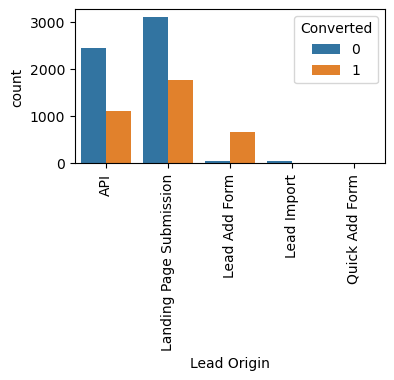

In [16]:
# Lets do Univariate Analysis of Lead Origin 
plt.figure(figsize=(4,2))
sns.countplot(x=leads_df['Lead Origin'],hue=leads_df['Converted'])
plt.xticks(rotation=90)
plt.show()

- ***We can say that "Lead Add Form " have highest conversion rate in comparison of other.***

In [17]:
# Checking lead source column
leads_df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

We can see there is two type of Google is written, since python is case senstive ,it is apperings as another varible category.
- We can change google to Google.
- We can merge few low value count columns to others.

In [18]:
leads_df['Lead Source']=leads_df['Lead Source'].replace("google","Google")
leads_df['Lead Source']=leads_df['Lead Source'].replace(["Facebook",'youtubechannel','Live Chat'],'Social Media')
leads_df['Lead Source']=leads_df['Lead Source'].replace(["blog", "Pay per Click Ads","bing","WeLearn","Click2call","welearnblog_Home","testone","Press_Release","NC_EDM"],"Others")

In [19]:
# Lets check Lead Source Column again
leads_df['Lead Source'].value_counts()

Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Social Media          60
Others                18
Name: Lead Source, dtype: int64

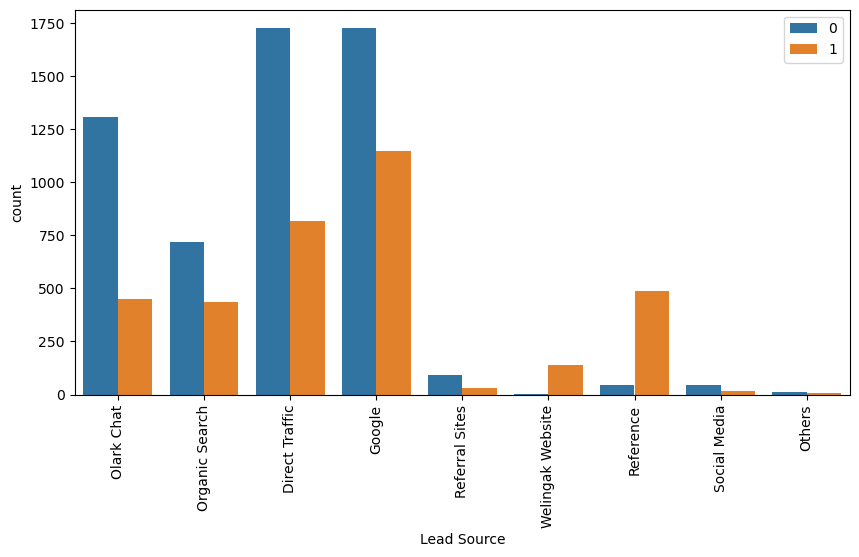

In [20]:
# Lets do Univariate Analysis of Lead Source 
plt.figure(figsize=(10,5))
s1=sns.countplot(leads_df['Lead Source'], hue=leads_df['Converted'])
plt.xticks(rotation=90)
plt.legend(loc=1)
plt.show()

 - **We Can see leads of Welingak Website & Reference have very higher conversion rate.**
 - **Where as Google, Direct Traffic , Organic Search & Olark Chat has lesser conversion ratio.**

In [21]:
# Lets check Country 
leads_df['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [22]:
# Since India is the most common occurence among the non-missing values we can impute all missing values with India

leads_df['Country']=leads_df['Country'].replace(np.NaN,"India")

In [23]:
#Lets check Country column again
leads_df['Country'].value_counts()

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [24]:
# Lets see % wise contribution
round((leads_df['Country'].value_counts()/leads_df['Country'].count())*100,2)

India                   96.89
United States            0.75
United Arab Emirates     0.57
Singapore                0.26
Saudi Arabia             0.23
United Kingdom           0.16
Australia                0.14
Qatar                    0.11
Hong Kong                0.08
Bahrain                  0.08
Oman                     0.06
France                   0.06
unknown                  0.05
South Africa             0.04
Nigeria                  0.04
Germany                  0.04
Kuwait                   0.04
Canada                   0.04
Sweden                   0.03
China                    0.02
Asia/Pacific Region      0.02
Uganda                   0.02
Bangladesh               0.02
Italy                    0.02
Belgium                  0.02
Netherlands              0.02
Ghana                    0.02
Philippines              0.02
Russia                   0.01
Switzerland              0.01
Vietnam                  0.01
Denmark                  0.01
Tanzania                 0.01
Liberia   

**We Can See Clearly for 96% Leads country is India Only. Therefore we can drop this column.**

In [25]:
#dropping country column
leads_df.drop("Country",1,inplace=True)

In [26]:
#Letus check City Column
leads_df['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [27]:
#Since Mumbai is mode of this column values , we can replace NaN values to Mumbai
leads_df['City']=leads_df['City'].replace(np.NaN,"Mumbai")

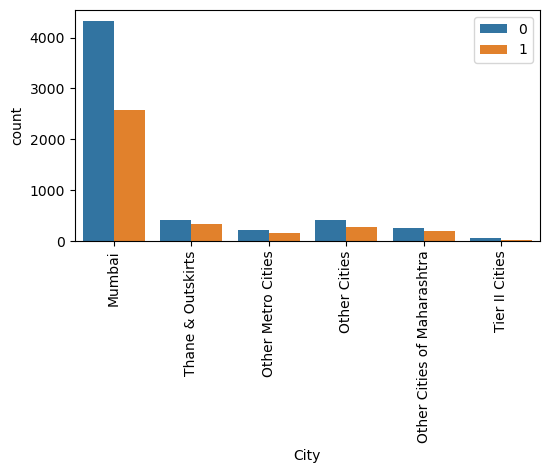

In [28]:
# Lets do Univariate Analysis of city 
plt.figure(figsize=(6,3))
s1=sns.countplot(leads_df['City'], hue=leads_df['Converted'])
plt.xticks(rotation=90)
plt.legend(loc=1)
plt.show()

In [29]:
# Lets check Last Activity
leads_df["Last Activity"].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

Since Email Opened is mod of the column , we can replace NaN values to Email Opened .
We can merge fewer value_counts to others


In [30]:
leads_df["Last Activity"]=leads_df["Last Activity"].replace(np.NaN,"Email Opened")
leads_df["Last Activity"]=leads_df["Last Activity"].replace(["Had a Phone Conversation","Approached upfront","View in browser link Clicked","Email Received","Email Marked Spam","Visited Booth in Tradeshow","Resubscribed to emails"],"Others")

In [31]:
leads_df["Last Activity"].value_counts(dropna=False)

Email Opened                 3540
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Form Submitted on Website     116
Unreachable                    93
Unsubscribed                   61
Others                         51
Name: Last Activity, dtype: int64

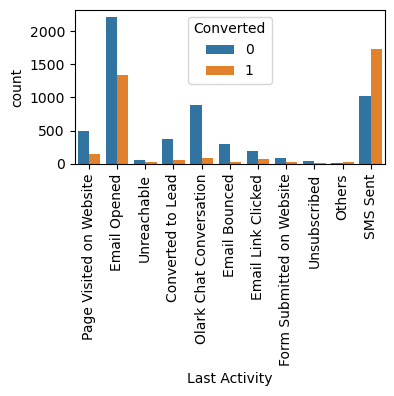

In [32]:
# Lets check the spread of Last Activity
plt.figure(figsize=(4,2))
sns.countplot(x=leads_df["Last Activity"],hue=leads_df["Converted"])
plt.xticks(rotation=90)
plt.show()

**We can clearly see that SMS Sent has high conversion rate than others.**

In [33]:
# Lets check Specialization column
leads_df["Specialization"].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [34]:
# Since No column is having more counts than NaN values , we can imput Others in place of NaN values.
leads_df["Specialization"]=leads_df["Specialization"].replace(np.NaN,"Others")

In [35]:
# Since there are many columns having Management in common we can merge them into one.
leads_df["Specialization"]=leads_df["Specialization"].replace(["Finance Management","Human Resource Management",
                                                               "Marketing Management",
                                                               "Operations Management",
                                                               "IT Projects Management","Supply Chain Management",
                                                              "Healthcare Management",
                                                               "Hospitality Management",
                                                               "Retail Management"],"Management")
leads_df["Specialization"]=leads_df["Specialization"].replace(["E-COMMERCE","E-Business"],"E_Commerce")

In [36]:
leads_df["Specialization"].value_counts(dropna=False)

Management                           4253
Others                               3380
Business Administration               403
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
E_Commerce                            169
Rural and Agribusiness                 73
Services Excellence                    40
Name: Specialization, dtype: int64

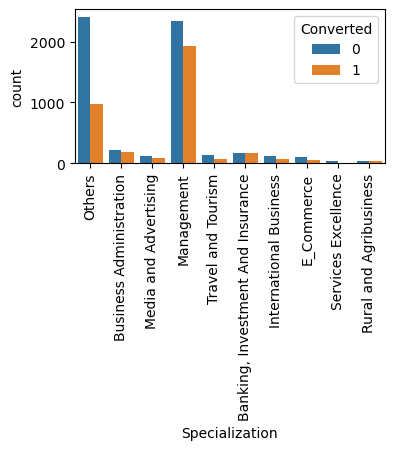

In [37]:
# Lets check spread of Specialization column
plt.figure(figsize=(4,2))
sns.countplot(x=leads_df["Specialization"],hue=leads_df["Converted"])
plt.xticks(rotation=90)
plt.show()

In [38]:
#How did you hear about X Education'

leads_df['How did you hear about X Education'].value_counts(dropna=False)

NaN                      7250
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [39]:
#Lets replace NaN values to Unknown Sources 
leads_df['How did you hear about X Education']=leads_df['How did you hear about X Education'].replace(np.NaN,"Unknown Sources")

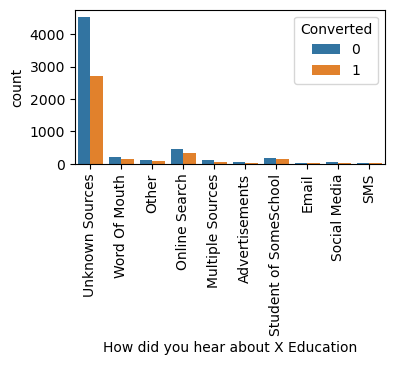

In [40]:
#Lets check the spread of this column with converted leads
plt.figure(figsize=(4,2))
sns.countplot(x=leads_df["How did you hear about X Education"],hue=leads_df["Converted"])
plt.xticks(rotation=90)
plt.show()

In [41]:
#Lets check Column-- What is your current occupation
leads_df["What is your current occupation"].value_counts(dropna=False)


Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [42]:
#Changing NaN Values to Unemployed Category
leads_df["What is your current occupation"]=leads_df["What is your current occupation"].replace(np.NaN,"Unemployed")

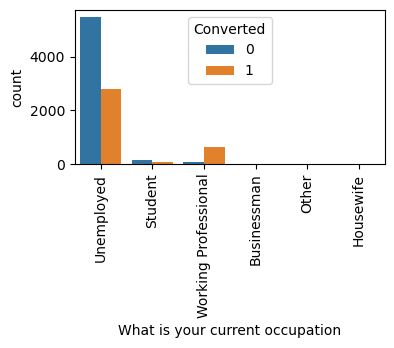

In [43]:
#Letus check the spread of column with respect to Converted Column
plt.figure(figsize=(4,2))
sns.countplot(x=leads_df["What is your current occupation"],hue=leads_df["Converted"])
plt.xticks(rotation=90)
plt.show()

- **We can clearly see that Working Professional are more succesfull leads.**
- **In terms of absolute numbers , unemployed is high.**

In [44]:
#Lets check What matters most to you in choosing a course column
leads_df["What matters most to you in choosing a course"].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [45]:
#We Can replace NaN values to Better Career Prospects.
leads_df["What matters most to you in choosing a course"]=leads_df["What matters most to you in choosing a course"].replace(np.NaN,"Better Career Prospects")

In [46]:
# Lets check again
leads_df["What matters most to you in choosing a course"].value_counts(dropna=False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

Since column category is almost same as "Better Career Prospects". We can drop this column.

In [47]:
Drop_Column=[]

In [48]:
#adding column to Dr0p_Column list
Drop_Column.append("What matters most to you in choosing a course")

In [49]:
#Lets check Search Column
leads_df["Search"].value_counts(dropna=False)

No     9226
Yes      14
Name: Search, dtype: int64

In [50]:
#We can drop this column also . Adding to Drop_Column list
Drop_Column.append("Search")

In [51]:
# Lets check Magazine Column
leads_df["Magazine"].value_counts(dropna=False)

No    9240
Name: Magazine, dtype: int64

In [52]:
#We can drop this column also . Adding to Drop_Column list
Drop_Column.append("Magazine")

In [53]:
#Lets check Newspaper Article column
leads_df["Newspaper Article"].value_counts(dropna=False)

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [54]:
#We can drop this column also . Adding to Drop_Column list
Drop_Column.append("Newspaper Article")

In [55]:
# Letus check X Education Forums column
leads_df['X Education Forums'].value_counts(dropna=False)

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [56]:
#We can drop this column also . Adding to Drop_Column list
Drop_Column.append("X Education Forums")

In [57]:
# Lets check Newspaper Column
leads_df["Newspaper"].value_counts(dropna=False)

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [58]:
#We can drop this column also . Adding to Drop_Column list
Drop_Column.append("Newspaper")

In [59]:
leads_df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [60]:
# Letus check Digital Advertisement column
leads_df["Digital Advertisement"].value_counts(dropna=False)

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [61]:
# We can drop this column also . Adding to Drop_Column list
Drop_Column.append("Digital Advertisement")

In [62]:
# Letus check Through Recommendations column
leads_df["Through Recommendations"].value_counts(dropna=False)

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [63]:
# We can drop this column also . Adding to Drop_Column list
Drop_Column.append("Through Recommendations")

In [64]:
# Letus check Receive More Updates About Our Courses column
leads_df["Receive More Updates About Our Courses"].value_counts(dropna=False)

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [65]:
# We can drop this column also . Adding to Drop_Column list
Drop_Column.append("Receive More Updates About Our Courses")

In [66]:
# Letus Check Tags column
leads_df["Tags"].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

We can convert NaN values to Will revert after reading the email.
Also we can merge fewer value counts columns to others

In [67]:
leads_df['Tags']=leads_df['Tags'].replace(np.NaN,"Will revert after reading the email")

In [68]:
leads_df["Tags"]=leads_df["Tags"].replace(["invalid number","Diploma holder (Not Eligible)",
                                           "wrong number given","opp hangup",
                                           "number not provided","in touch with EINS","Lost to Others","Still Thinking"
                                           ,"Want to take admission but has financial problems","In confusion whether part time or DLP",
                                           "Interested in Next batch","Lateral student","Shall take in the next coming month",
                                           "University not recognized","Recognition issue (DEC approval)"],"Others")

In [69]:
# Letus check again
leads_df["Tags"].value_counts(dropna=False)

Will revert after reading the email    5425
Ringing                                1203
Interested in other courses             513
Already a student                       465
Closed by Horizzon                      358
Others                                  302
switched off                            240
Busy                                    186
Lost to EINS                            175
Not doing further education             145
Interested  in full time MBA            117
Graduation in progress                  111
Name: Tags, dtype: int64

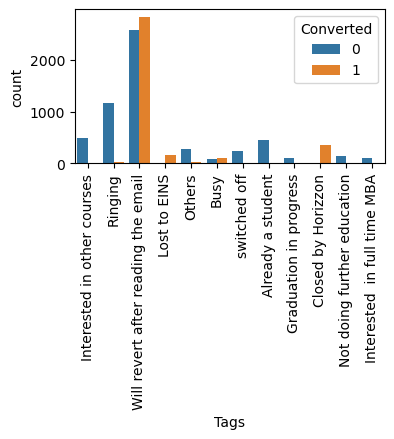

In [70]:
# Letus check spread of column with respect to  converted 
plt.figure(figsize=(4,2))
sns.countplot(x=leads_df["Tags"],hue=leads_df["Converted"])
plt.xticks(rotation=90)
plt.show()

In [71]:
# Letus check 'Update me on Supply Chain Content' column
leads_df['Update me on Supply Chain Content'].value_counts(dropna=False)

No    9240
Name: Update me on Supply Chain Content, dtype: int64

In [72]:
# We can drop this column also . Adding to Drop_Column list
Drop_Column.append("Update me on Supply Chain Content")

In [73]:
# Letus check 'Get updates on DM Content'
leads_df["Get updates on DM Content"].value_counts(dropna=False)

No    9240
Name: Get updates on DM Content, dtype: int64

In [74]:
# We can drop this column also . Adding to Drop_Column list
Drop_Column.append("Get updates on DM Content")

In [75]:
# Letus check 'Lead Profile'
leads_df["Lead Profile"].value_counts(dropna=False)

NaN                            6855
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

We can convert NaN values to Unidentified category`

In [76]:
leads_df["Lead Profile"]=leads_df["Lead Profile"].replace(np.NaN,"Unidentified")

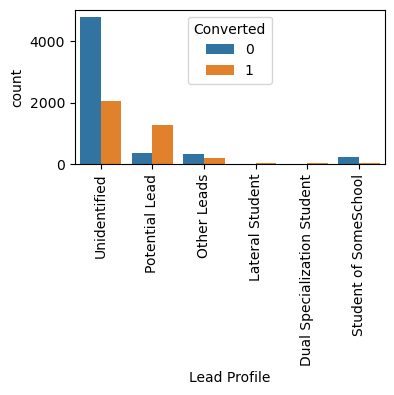

In [77]:
# Letus check spread of the column with respect to converted
plt.figure(figsize=(4,2))
sns.countplot(x=leads_df["Lead Profile"],hue=leads_df["Converted"])
plt.xticks(rotation=90)
plt.show()

Column with Potential Lead is higher conversion rate . In absolute numbers , unidentified category is having more columns.

In [78]:
# Letus check I agree to pay the amount through cheque column
leads_df["I agree to pay the amount through cheque"].value_counts(dropna=False)

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

In [79]:
# We can drop this column also . Adding to Drop_Column list
Drop_Column.append("I agree to pay the amount through cheque")

In [80]:
# Letus check 'A free copy of Mastering The Interview' column
leads_df["A free copy of Mastering The Interview"].value_counts(dropna=False)

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [81]:
# Letus check 'Last Notable Activity' column
leads_df["Last Notable Activity"].value_counts(dropna=False)

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [82]:
# letus merge fewer count to Others category
leads_df["Last Notable Activity"]=leads_df["Last Notable Activity"].replace(["Email Bounced","Unsubscribed",
                    "Unreachable"   ,  "Had a Phone Conversation" ,"Email Marked Spam" ,"Approached upfront"  ,
                     "Resubscribed to emails","View in browser link Clicked","Form Submitted on Website",
                "Email Received " ],"Others")

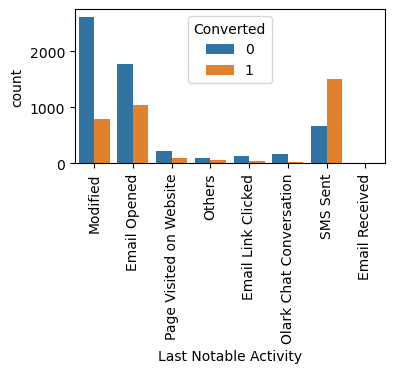

In [83]:
# Letus check spread of the column with respect to converted
plt.figure(figsize=(4,2))
sns.countplot(x=leads_df["Last Notable Activity"],hue=leads_df["Converted"])
plt.xticks(rotation=90)
plt.show()

In [84]:
# Letus drop the columns of Drop_Column list
leads_df.drop(Drop_Column,axis=1, inplace=True)

In [85]:
# Letus check final dataframe
leads_df.shape

(9240, 17)

In [86]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9204 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Do Not Call                             9240 non-null   object 
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9103 non-null   float64
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9103 non-null   float64
 8   Last Activity                           9240 non-null   object 
 9   Specialization                          9240 non-null   object 
 10  How did you hear about X Education      9240 non-null   obje

In [88]:
# Letus check again for null value percentage
round((leads_df.isnull().sum()/leads_df.shape[0])*100,2)

Lead Origin                               0.00
Lead Source                               0.39
Do Not Email                              0.00
Do Not Call                               0.00
Converted                                 0.00
TotalVisits                               1.48
Total Time Spent on Website               0.00
Page Views Per Visit                      1.48
Last Activity                             0.00
Specialization                            0.00
How did you hear about X Education        0.00
What is your current occupation           0.00
Tags                                      0.00
Lead Profile                              0.00
City                                      0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

In [91]:
# Since only 1.5 % values have are missing , we can drop these rows.Lets dropp null rows
leads_df=leads_df.dropna()

In [92]:
# Letus check again for null value percentage
round((leads_df.isnull().sum()/leads_df.shape[0])*100,2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
How did you hear about X Education        0.0
What is your current occupation           0.0
Tags                                      0.0
Lead Profile                              0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

Finally we have reduced our dataframe columns from 37 to 17 . Also we have dealt with null values.